## Estudo de caso da performance de estudantes no curso de matemática

##### Features utilizadas
__sex__  - student's sex (binary: "F" - female or "M" - male) \
__age__  - student's age (numeric: from 15 to 22)\
__address__  - student's home address type (binary: "U" - urban or "R" - rural)\
__Mjob__  - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")\
__Fjob__  - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")\
__studytime__  - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)\
__famsup__  - family educational support (binary: yes or no)\
__activities__  - extra-curricular activities (binary: yes or no)\
__higher__  - wants to take higher education (binary: yes or no)\
__internet__  - Internet access at home (binary: yes or no)\
__freetime__  - free time after school (numeric: from 1 - very low to 5 - very high)\
__health__  - current health status (numeric: from 1 - very bad to 5 - very good)\
__absences__  - number of school absences (numeric: from 0 to 93)\

##### Target
__G3__  - final grade (numeric: from 0 to 20, output target)

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
path = r'C:\Users\Felipe\Desktop\Student Performance\student-mat.csv'
db = pd.read_csv(path, sep = ';')
db.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [11]:
dataset = db[[ 'sex','age','address', 'studytime', 'famsup','activities',
            'higher', 'internet', 'freetime', 'health', 'absences', 'G3']]

dataset['sex'] = dataset['sex'].replace(['F','M'],[0,1])
dataset['address'] = dataset['address'].replace(['U','R'],[0,1])
dataset['famsup'] = dataset['famsup'].replace(['no','yes'],[0,1])
dataset['activities'] = dataset['activities'].replace(['no','yes'],[0,1])
dataset['higher'] = dataset['higher'].replace(['no','yes'],[0,1])
dataset['internet'] = dataset['internet'].replace(['no', 'yes'], [0,1])

dataset.head()

,sex,age,address,studytime,famsup,activities,higher,internet,freetime,health,absences,G3
0,0,18,0,2,0,0,1,0,3,3,6,6
1,0,17,0,2,1,0,1,1,3,3,4,6
2,0,15,0,2,0,0,1,1,3,3,10,10
3,0,15,0,3,1,1,1,1,2,5,2,15
4,0,16,0,2,1,0,1,0,3,5,4,10


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   address     395 non-null    int64
 3   studytime   395 non-null    int64
 4   famsup      395 non-null    int64
 5   activities  395 non-null    int64
 6   higher      395 non-null    int64
 7   internet    395 non-null    int64
 8   freetime    395 non-null    int64
 9   health      395 non-null    int64
 10  absences    395 non-null    int64
 11  G3          395 non-null    int64
dtypes: int64(12)
memory usage: 37.2 KB


In [13]:
features = ['sex','studytime','famsup','higher','freetime','internet']
for i in features:
    print(f'Quantidade de valores por agrupamento na feature {i}:\n',pd.DataFrame(dataset[i].value_counts(ascending = True)))
    

Quantidade de valores por agrupamento na feature sex:
    sex
1  187
0  208
Quantidade de valores por agrupamento na feature studytime:
    studytime
4         27
3         65
1        105
2        198
Quantidade de valores por agrupamento na feature famsup:
    famsup
0     153
1     242
Quantidade de valores por agrupamento na feature higher:
    higher
0      20
1     375
Quantidade de valores por agrupamento na feature freetime:
    freetime
1        19
5        40
2        64
4       115
3       157
Quantidade de valores por agrupamento na feature internet:
    internet
0        66
1       329


## Feature selection

##### Existem várias formas de se realizar a seleção de variáveis a serem utilizadas no problema, esta redução de dimensionalidade facilita a interpretação de modelos, promove redução do custo computacional e aumenta a precisão do resultado gerado. Podemos realizar a redução através de basicamente dois métodos: extração (criação de novas variáveis com base na transformação ou combinação de conjuntos de variáveis existentes) e seleção de variáveis.
Para este estudo de caso foi utilizado o método de seleção, por motivos práticos.

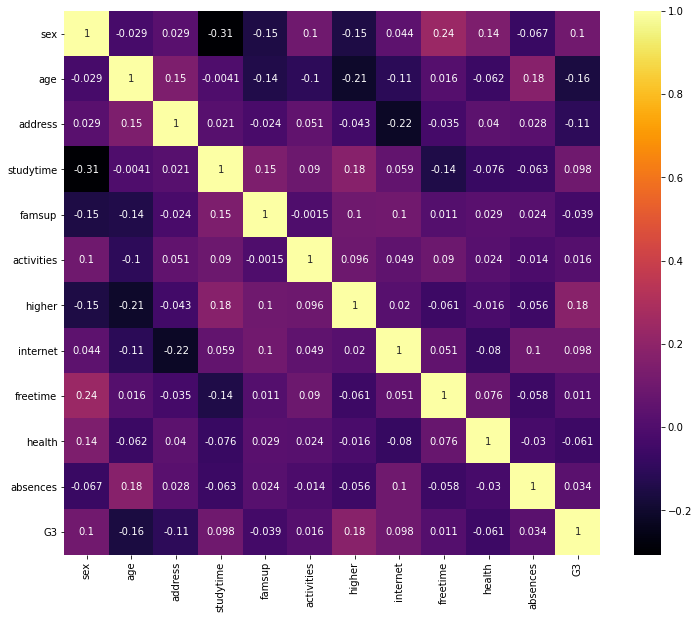

In [14]:
plt.figure(figsize = (12,10))
cor = dataset.corr()
sns.heatmap(cor, annot = True, cmap='inferno')
plt.show()

In [15]:
dataset['G3'].replace([1,2,3,4,5,6,7,8,9], 0, inplace = True)
dataset['G3'].replace([10,11,12,13,14,15,16,17,18,19,20], 1, inplace = True)
dataset['G3'].head

<bound method NDFrame.head of 0      0
1      0
2      1
3      1
4      1
      ..
390    0
391    1
392    0
393    1
394    0
Name: G3, Length: 395, dtype: int64>

In [16]:
###### RMARKDOWN DO DECISION TREE

In [41]:
train_set, test_set = train_test_split(dataset, test_size = 0.2, random_state = 0)

x_train_set = train_set.drop('G3', axis = 1)
y_train_set = train_set['G3']

x_test_set = test_set.drop('G3', axis = 1)
y_test_set = test_set['G3']


In [87]:
tree_classifier = DecisionTreeClassifier(max_depth = 2, random_state = 0)

tree_classifier.fit(x_train_set, y_train_set)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [88]:
y_predict = tree_classifier.predict(x_test_set)
y_train_predict = tree_classifier.predict(x_train_set)

tree_classifier.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

In [89]:
confusion_matrix(y_test_set, y_predict)

array([[ 7, 23],
       [ 8, 41]], dtype=int64)

In [90]:
#RMARKDOWN EXPLICANDO MATRIZ CONFUSÃO

In [91]:
precision_score(y_test_set, y_predict)

0.640625

In [92]:
precision_score(y_train_set, y_train_predict)

0.7510204081632653

In [93]:
recall_score(y_test_set, y_predict)

0.8367346938775511

In [94]:
recall_score(y_train_set,y_train_predict)

0.8518518518518519